# Purpose of this project

* ## find a correlaion between the drama script and content completion rate

---
---
---

https://www.whats-on-netflix.com/news/are-completion-rates-key-to-netflix-cancelations/
<img src="./image/1.PNG" width="700" />
<img src="./image/3.PNG" width="700" />

---
---
---

# Can we measure the completion rate through the script?

## 1. Gather two script data 
* The Irregulars : the lowest completion rate in upper image
* Squid Game : the highest completion rate in upper image > This is what I'm going to present 
 

## 2. Get dialogues without actions
* dropout actions : measure the depth between the characters using network analysis, not mise en scene(in the scene)
* make dataframe : make a dataframe with charector and dialogue

 

## 3. Measure the depth of emotions 
* run a network analysis : Using the dataframe, do a network analysis with each of episode of two drama-The Irregulars and Squid Game
* Compare the firues 

---
---
---

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('./data/Sec_epi.xlsx')

In [3]:
df.tail()

,Time,Subtitle,Translation,Transliteration
491,46:43,2015년,The year 2015…,2015nyeon
492,46:44,[준호의 놀란 숨소리],"LIST OF PLAYERS 1, 2015",[ junho-ui nollan sumsoli ]
493,46:51,132번,Number 132…,132beon
494,47:04,형,Brother.,hyeong
495,50:03,자막: 안현정,"Subtitle translation by:\nEun-sook Yoon, Sharo...",jamag : anhyeonjeong


In [4]:
df.drop(df.tail(1).index,inplace=True) 

In [5]:
df

,Time,Subtitle,Translation,Transliteration
0,11s,"[4조 조원들의 힘겨운 신음] (미녀) 야, 어떻게 좀 해 봐, 이 씨발!",Do something! God damn it!,[ 4jo jo-wondeul-ui himgyeo-un sin-eum ]...
1,17s,(상우) 다들 정신 차리고 내 말 들어!,Pull yourselves together and listen up!,( sang-u ) dadeul jeongsin chaligo nae...
2,19s,내가 신호하면 딱 세 발만 앞으로 가는 거야,"When I give the sign,\njust take three steps f...",naega sinhohamyeon ttag se balman ap...
3,22s,앞으로 가라고? 미쳤어!,Go forward? Are you crazy?,ap-eulo galago ? michyeoss-eo !
4,25s,저쪽을 넘어뜨려야 돼!,We have to make them trip!,jeo-jjog-eul neom-eo-tteulyeo-ya dwae !
...,...,...,...,...
490,46:35,(준호) '황인호',Hwang In-ho.,( junho ) ' hwang-inho '
491,46:43,2015년,The year 2015…,2015nyeon
492,46:44,[준호의 놀란 숨소리],"LIST OF PLAYERS 1, 2015",[ junho-ui nollan sumsoli ]
493,46:51,132번,Number 132…,132beon


In [6]:
df['Transliteration'] = df['Transliteration'].str.replace(')', '(')
# df['Translation'].str.split('(', expand=True)[1].


/var/folders/ps/mmfjqxl52pb1b3b_0bbt37gr0000gn/T/ipykernel_8933/3730998028.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Transliteration'] = df['Transliteration'].str.replace(')', '(')


In [7]:
df['Transliteration'] = df['Transliteration'].str.rjust(width=1)

In [8]:
df['Transliteration']  = df['Transliteration'].str.split('(', expand=True)[1]

In [9]:
df.head()

,Time,Subtitle,Translation,Transliteration
0,11s,"[4조 조원들의 힘겨운 신음] (미녀) 야, 어떻게 좀 해 봐, 이 씨발!",Do something! God damn it!,minyeo
1,17s,(상우) 다들 정신 차리고 내 말 들어!,Pull yourselves together and listen up!,sang-u
2,19s,내가 신호하면 딱 세 발만 앞으로 가는 거야,"When I give the sign,\njust take three steps f...",None
3,22s,앞으로 가라고? 미쳤어!,Go forward? Are you crazy?,None
4,25s,저쪽을 넘어뜨려야 돼!,We have to make them trip!,None


In [10]:
df = df[['Time', 'Transliteration', 'Translation']]

In [11]:
df.columns = ['Time', 'Character', 'Translation']

In [12]:
df.head(20)

,Time,Character,Translation
0,11s,minyeo,Do something! God damn it!
1,17s,sang-u,Pull yourselves together and listen up!
2,19s,None,"When I give the sign,\njust take three steps f..."
3,22s,None,Go forward? Are you crazy?
4,25s,None,We have to make them trip!
5,27s,None,That's bullshit!
6,28s,None,Let's give it a shot!
7,30s,minyeo,"No, I can't do it!"
8,31s,sang-u,"If you can't, you'll die!"
9,33s,None,On the count of three! One!


In [13]:
df['Time'] = df['Time'].str.replace('s', '')

/var/folders/ps/mmfjqxl52pb1b3b_0bbt37gr0000gn/T/ipykernel_8933/519211182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].str.replace('s', '')


In [14]:
df['Time_sec'] = [int(x[0])*60 + int(x[1]) if len(x) >1 else int(x[0]) for x in df['Time'].str.split(':')]

In [15]:
df['Time_diff'] = df['Time_sec'].diff()

In [16]:
df['Time_diff'] = df['Time_diff'].fillna(2)

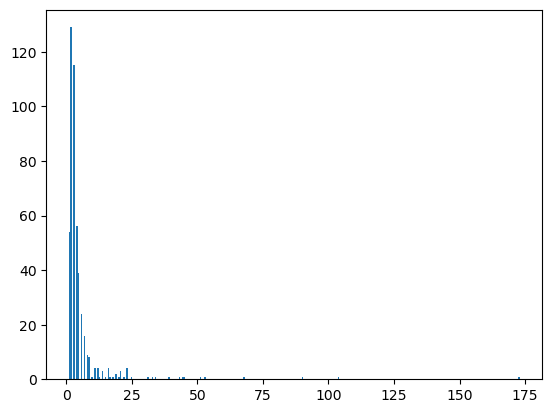

In [17]:
import matplotlib.pyplot as plt

plt.hist(df['Time_diff'], bins = 300)

plt.show()

In [18]:
# df[df['Time_diff']>25]

q3 = df['Time_diff'].quantile(0.75) # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = df['Time_diff'].quantile(0.25)

print(q1, q3)

2.0 5.0


In [19]:
df.head(20)

,Time,Character,Translation,Time_sec,Time_diff
0,11,minyeo,Do something! God damn it!,11,2.0
1,17,sang-u,Pull yourselves together and listen up!,17,6.0
2,19,None,"When I give the sign,\njust take three steps f...",19,2.0
3,22,None,Go forward? Are you crazy?,22,3.0
4,25,None,We have to make them trip!,25,3.0
5,27,None,That's bullshit!,27,2.0
6,28,None,Let's give it a shot!,28,1.0
7,30,minyeo,"No, I can't do it!",30,2.0
8,31,sang-u,"If you can't, you'll die!",31,1.0
9,33,None,On the count of three! One!,33,2.0


In [20]:
df['split_point'] = np.where((df['Time_diff'] > q3), 1, 0).cumsum()

In [21]:
df.head(20)

,Time,Character,Translation,Time_sec,Time_diff,split_point
0,11,minyeo,Do something! God damn it!,11,2.0,0
1,17,sang-u,Pull yourselves together and listen up!,17,6.0,1
2,19,None,"When I give the sign,\njust take three steps f...",19,2.0,1
3,22,None,Go forward? Are you crazy?,22,3.0,1
4,25,None,We have to make them trip!,25,3.0,1
5,27,None,That's bullshit!,27,2.0,1
6,28,None,Let's give it a shot!,28,1.0,1
7,30,minyeo,"No, I can't do it!",30,2.0,1
8,31,sang-u,"If you can't, you'll die!",31,1.0,1
9,33,None,On the count of three! One!,33,2.0,1


In [22]:
df['Character'] = df['Character'].fillna('N/A')

In [23]:
# df.groupby(['split_point'], as_index=False).apply(lambda x: ', '.join(x['Character']))
df['Characters'] = df.groupby('split_point').apply(lambda x: ', '.join(x.Character))

In [24]:
df_character = df.groupby('split_point').apply(lambda x: ', '.join(x.Character)).to_frame().reset_index()

In [25]:
df_merge = pd.merge(df, df_character[['split_point', 0]], on = 'split_point').drop(columns ='Characters')

In [26]:
df_merge.rename(columns = {0 : 'Charaters'}, inplace=True)

In [27]:
df_merge['Charaters'] = df_merge['Charaters'].apply(lambda x : set(x.replace(' ', '').split(',')))

In [28]:
df_merge.Charaters.value_counts()

{N/A}                                                         70
{sang-u, minyeo, N/A, gihun, alli}                            34
{byeongjeong2, byeongjeong1, byeonggi, N/A}                   34
{N/A, junho, ilkkun}                                          26
{N/A, byeongjeong1}                                           23
{ilnam, N/A}                                                  21
{byeonggi, byeongjeong1, byeongjeong2, ilkkun, N/A, gihun}    19
{N/A, ilkkun}                                                 19
{sang-u, saebyeog, N/A, namja4, namja2}                       17
{N/A, alli}                                                   16
{N/A, gihun}                                                  16
{sang-u, deogsu, N/A, namja6, gihun}                          15
{N/A, ilkkun, byeongjeong1}                                   15
{byeonggi, byeongjeong1, byeongjeong2, junho, N/A}            13
{N/A, namja2}                                                 10
{N/A, sang-u, minyeo}    

In [29]:
df_merge[df_merge['Charaters']=={'N/A'}]

,Time,Character,Translation,Time_sec,Time_diff,split_point,Charaters
11,46,N/A,Pull!,46,12.0,2,{N/A}
12,51,N/A,Pull…,51,5.0,2,{N/A}
13,1:14,N/A,Pull!,74,23.0,3,{N/A}
19,3:09,N/A,You're still breathing\nand moving that tongue...,189,9.0,6,{N/A}
20,3:13,N/A,thanks to that old man,193,4.0,6,{N/A}
...,...,...,...,...,...,...,...
489,46:26,N/A,LIST OF WINNERS,2786,33.0,98,{N/A}
491,46:43,N/A,The year 2015…,2803,8.0,100,{N/A}
492,46:44,N/A,"LIST OF PLAYERS 1, 2015",2804,1.0,100,{N/A}
493,46:51,N/A,Number 132…,2811,7.0,101,{N/A}


In [30]:
df_merge.shape

(495, 7)

In [31]:
495*9

4455